In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

plt.style.use('seaborn-poster')

In [2]:
path_to_data = '/home/Mount_sda1/alexmakh/data_to_paper/'
titlesize = 25

# Compare TS and mirdb

In [3]:
intersec = pd.read_csv(path_to_data + 'comparasion.tsv', sep='\t')
intersec

,isomiRNA,TargetScan full,TargetScan to mirdb size
0,hsa-let-7a-2-3p|+1,95.336788,38.341969
1,hsa-let-7a-2-3p|+2,94.545455,25.454545
2,hsa-let-7a-2-3p|+3,92.592593,12.345679
3,hsa-let-7a-2-3p|-1,97.149123,49.122807
4,hsa-let-7a-2-3p|-2,98.299320,42.176871
...,...,...,...
12035,hsa-miR-99b-5p|+3,87.500000,25.000000
12036,hsa-miR-99b-5p|-1,100.000000,0.000000
12037,hsa-miR-99b-5p|-2,100.000000,0.000000
12038,hsa-miR-99b-5p|-3,96.236559,28.494624


In [4]:
def plot_hist_kde(x, title):
#     fig, ax = plt.subplots()
    sns.histplot(data=intersec, x=x, kde=True)
    plt.axvline(intersec[x].mean(), color='r')
    plt.suptitle(title, fontsize=titlesize)
    
    plt.tight_layout()
    plt.show()

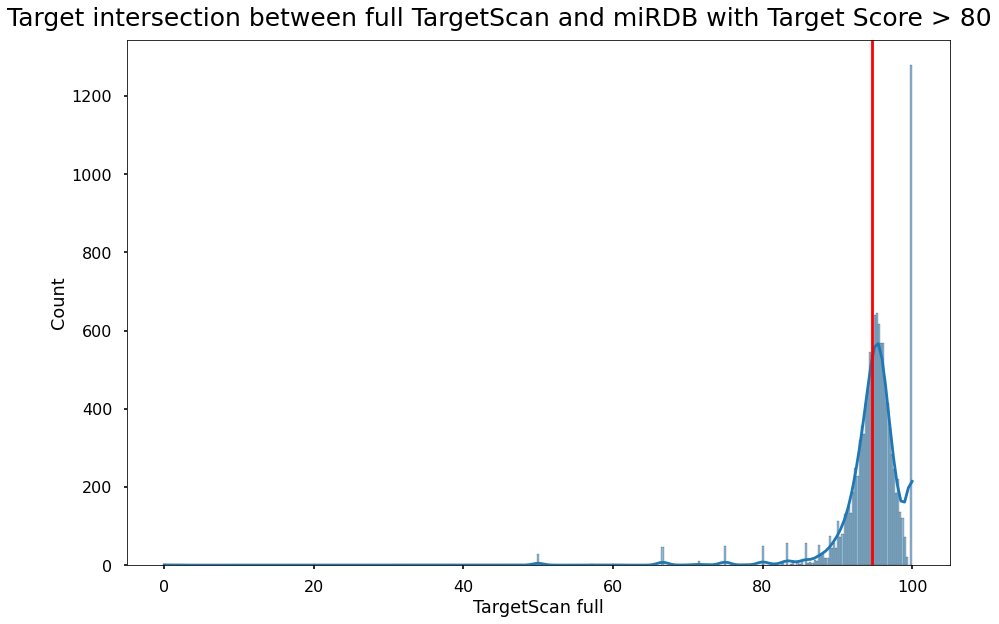

In [5]:
plot_hist_kde('TargetScan full', 'Target intersection between full TargetScan and miRDB with Target Score > 80')

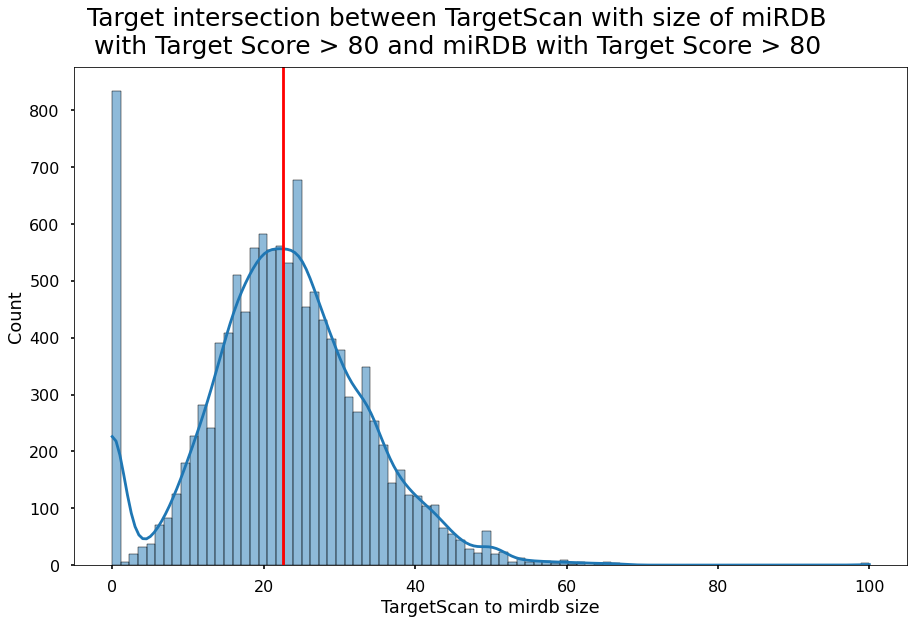

In [6]:
plot_hist_kde('TargetScan to mirdb size', 'Target intersection between TargetScan with size of miRDB\nwith Target Score > 80 and miRDB with Target Score > 80')

# Compare isomiRNAs with one nucleotide difference

In [7]:
def get_num(num):
    num = int(num)
    upper = num + 1
    
    upper = '+' + str(upper) if upper > 0 else str(upper)
    return upper

In [8]:
def get_1_iso_comparasion(df):
    col_count, col_count_1 = 'isomiRNA|count', 'isomiRNA|+1|count'
    col_intersection, col_union = 'isomiRNA|+1|intersection', 'isomiRNA|+1|union'
    res = pd.DataFrame({}, columns=[col_intersection, col_union, col_count, col_count_1])

    mirs = sorted(list(set(df.index)))
    dictir = {}
    for mir, targets in tqdm(df.groupby('isomiRNA')):
        dictir[mir] = set(targets['Gene Symbol'])

    for mir in tqdm(mirs):
        m, i = mir.split('|')
        upper = m + '|' + get_num(i)
        
        len_mir = len(dictir[mir])
        res.loc[mir, col_count] = len_mir

        try:
            len_upper = len(dictir[upper])
            res.loc[mir, col_count_1] = len_upper
            res.loc[mir, col_union] = len(dictir[mir] | dictir[upper]) / (len_mir + len_upper)
            res.loc[mir, col_intersection] = len(dictir[mir] & dictir[upper]) / (len_mir + len_upper)
        except KeyError:
            continue


    return res.copy()

In [9]:
mirdb = pd.read_csv(path_to_data + 'mirdb_res_80_upper.tsv', sep='\t', index_col=0).iloc[:, :-1]
mirdb1 = get_1_iso_comparasion(mirdb)
mirdb1

,isomiRNA|+1|intersection,isomiRNA|+1|union,isomiRNA|count,isomiRNA|+1|count
hsa-let-7a-2-3p|+1,0.016502,0.983498,193,110
hsa-let-7a-2-3p|+2,0.151832,0.848168,110,81
hsa-let-7a-2-3p|+3,NaN,NaN,81,NaN
hsa-let-7a-2-3p|-1,0.06,0.94,456,294
hsa-let-7a-2-3p|-2,0.165333,0.834667,294,456
...,...,...,...,...
hsa-miR-99b-5p|+3,NaN,NaN,8,NaN
hsa-miR-99b-5p|-1,0.0,1.0,2,18
hsa-miR-99b-5p|-2,0.0,1.0,5,2
hsa-miR-99b-5p|-3,0.0,1.0,186,5


In [10]:
ts = pd.read_csv(path_to_data + 'ts_res_80_upper.tsv', sep='\t', index_col=0).iloc[:, :-1]
ts1 = get_1_iso_comparasion(ts)
ts1

,isomiRNA|+1|intersection,isomiRNA|+1|union,isomiRNA|count,isomiRNA|+1|count
hsa-let-7a-2-3p|+1,0.023102,0.976898,193,110
hsa-let-7a-2-3p|+2,0.08377,0.91623,110,81
hsa-let-7a-2-3p|+3,NaN,NaN,81,NaN
hsa-let-7a-2-3p|-1,0.053333,0.946667,456,294
hsa-let-7a-2-3p|-2,0.074667,0.925333,294,456
...,...,...,...,...
hsa-miR-99b-5p|+3,NaN,NaN,8,NaN
hsa-miR-99b-5p|-1,0.0,1.0,2,18
hsa-miR-99b-5p|-2,0.0,1.0,5,2
hsa-miR-99b-5p|-3,0.010471,0.989529,186,5


In [11]:
def print_hist_kde1(df, set_, ax):
    x = 'isomiRNA|+1|' + set_
    df = df.dropna(subset=[x], axis=0).astype(float)
    
    sns.histplot(data=df, x=x, kde=True, ax=ax)
    ax.axvline(df[x].mean(), color='r')
    ax.set_title(f'Intersection between isomiRNA and {x}')

def print_1_isomir(df, name):
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    print_hist_kde1(df, 'intersection', ax[0])
    print_hist_kde1(df, 'union', ax[1])
    fig.suptitle(name, fontsize=titlesize)
    plt.tight_layout()
    plt.show()

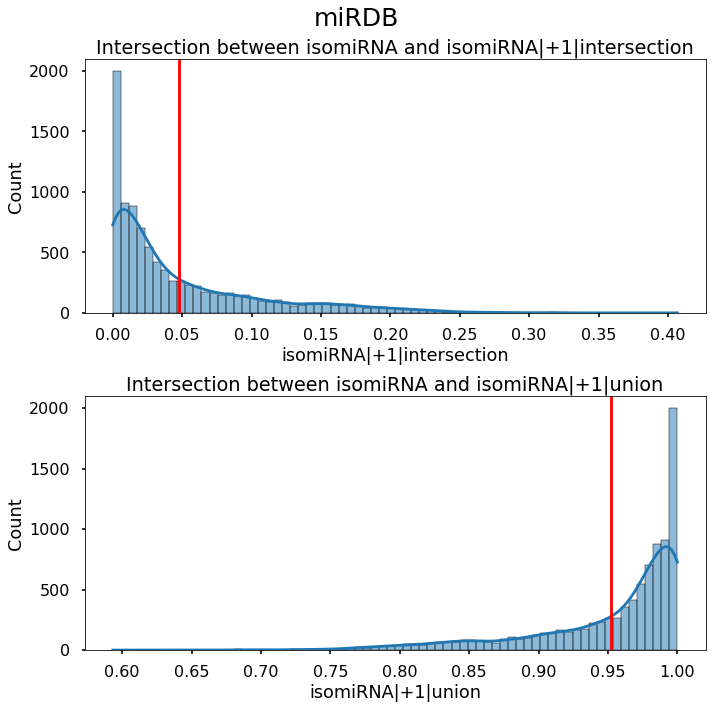

In [12]:
print_1_isomir(mirdb1, 'miRDB')

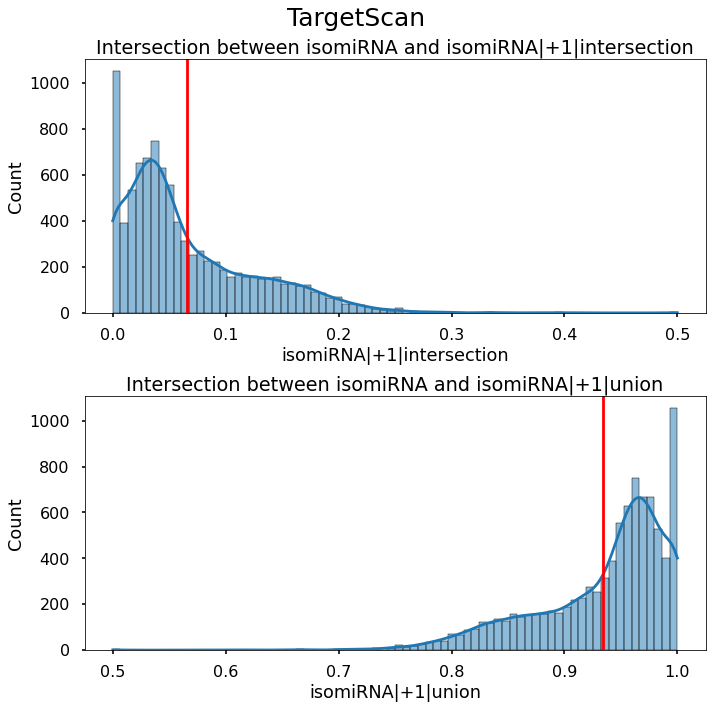

In [13]:
print_1_isomir(ts1, 'TargetScan')

# Intersections between projects

In [14]:
mirdb_path = '/home/alexgorbonos/huge/alexgorbonos/isomiR_research/miRDB/predicted_targets/'
ts_path = '/home/alexmakh/huge/alexmakh/isomiRNA/TCGA_data/'
isomir = "isomiR"

files_mirdb = sorted((set(os.listdir(mirdb_path))))
files_ts = set(os.listdir(ts_path))
if files_ts != set(files_mirdb):
    print('Different count of files')

df = pd.DataFrame({}, columns=files_mirdb)
col = 'Gene Symbol'
for file in tqdm(files_mirdb):
    mirdb = pd.read_csv(mirdb_path + file, sep='\t')
    ts = pd.read_csv(ts_path + file, sep='\t')
    
    groupby_ts = ts.groupby(isomir)
    groupby_mirdb = mirdb.groupby(isomir)

    for mir, t_ in groupby_ts:
        m_ = groupby_mirdb.get_group(mir)

        target_ts = t_[col]
        target_mirdb = m_[col]

        tmp_inter = len(set(target_ts) & set(target_mirdb))
        if t_.shape[0] != m_.shape[0]:
            print('bad file', mir)
            break
        df.loc[mir, file] = tmp_inter / m_.shape[0]
df['median'] = df.median(axis=1)
df['mean'] = df.mean(axis=1)

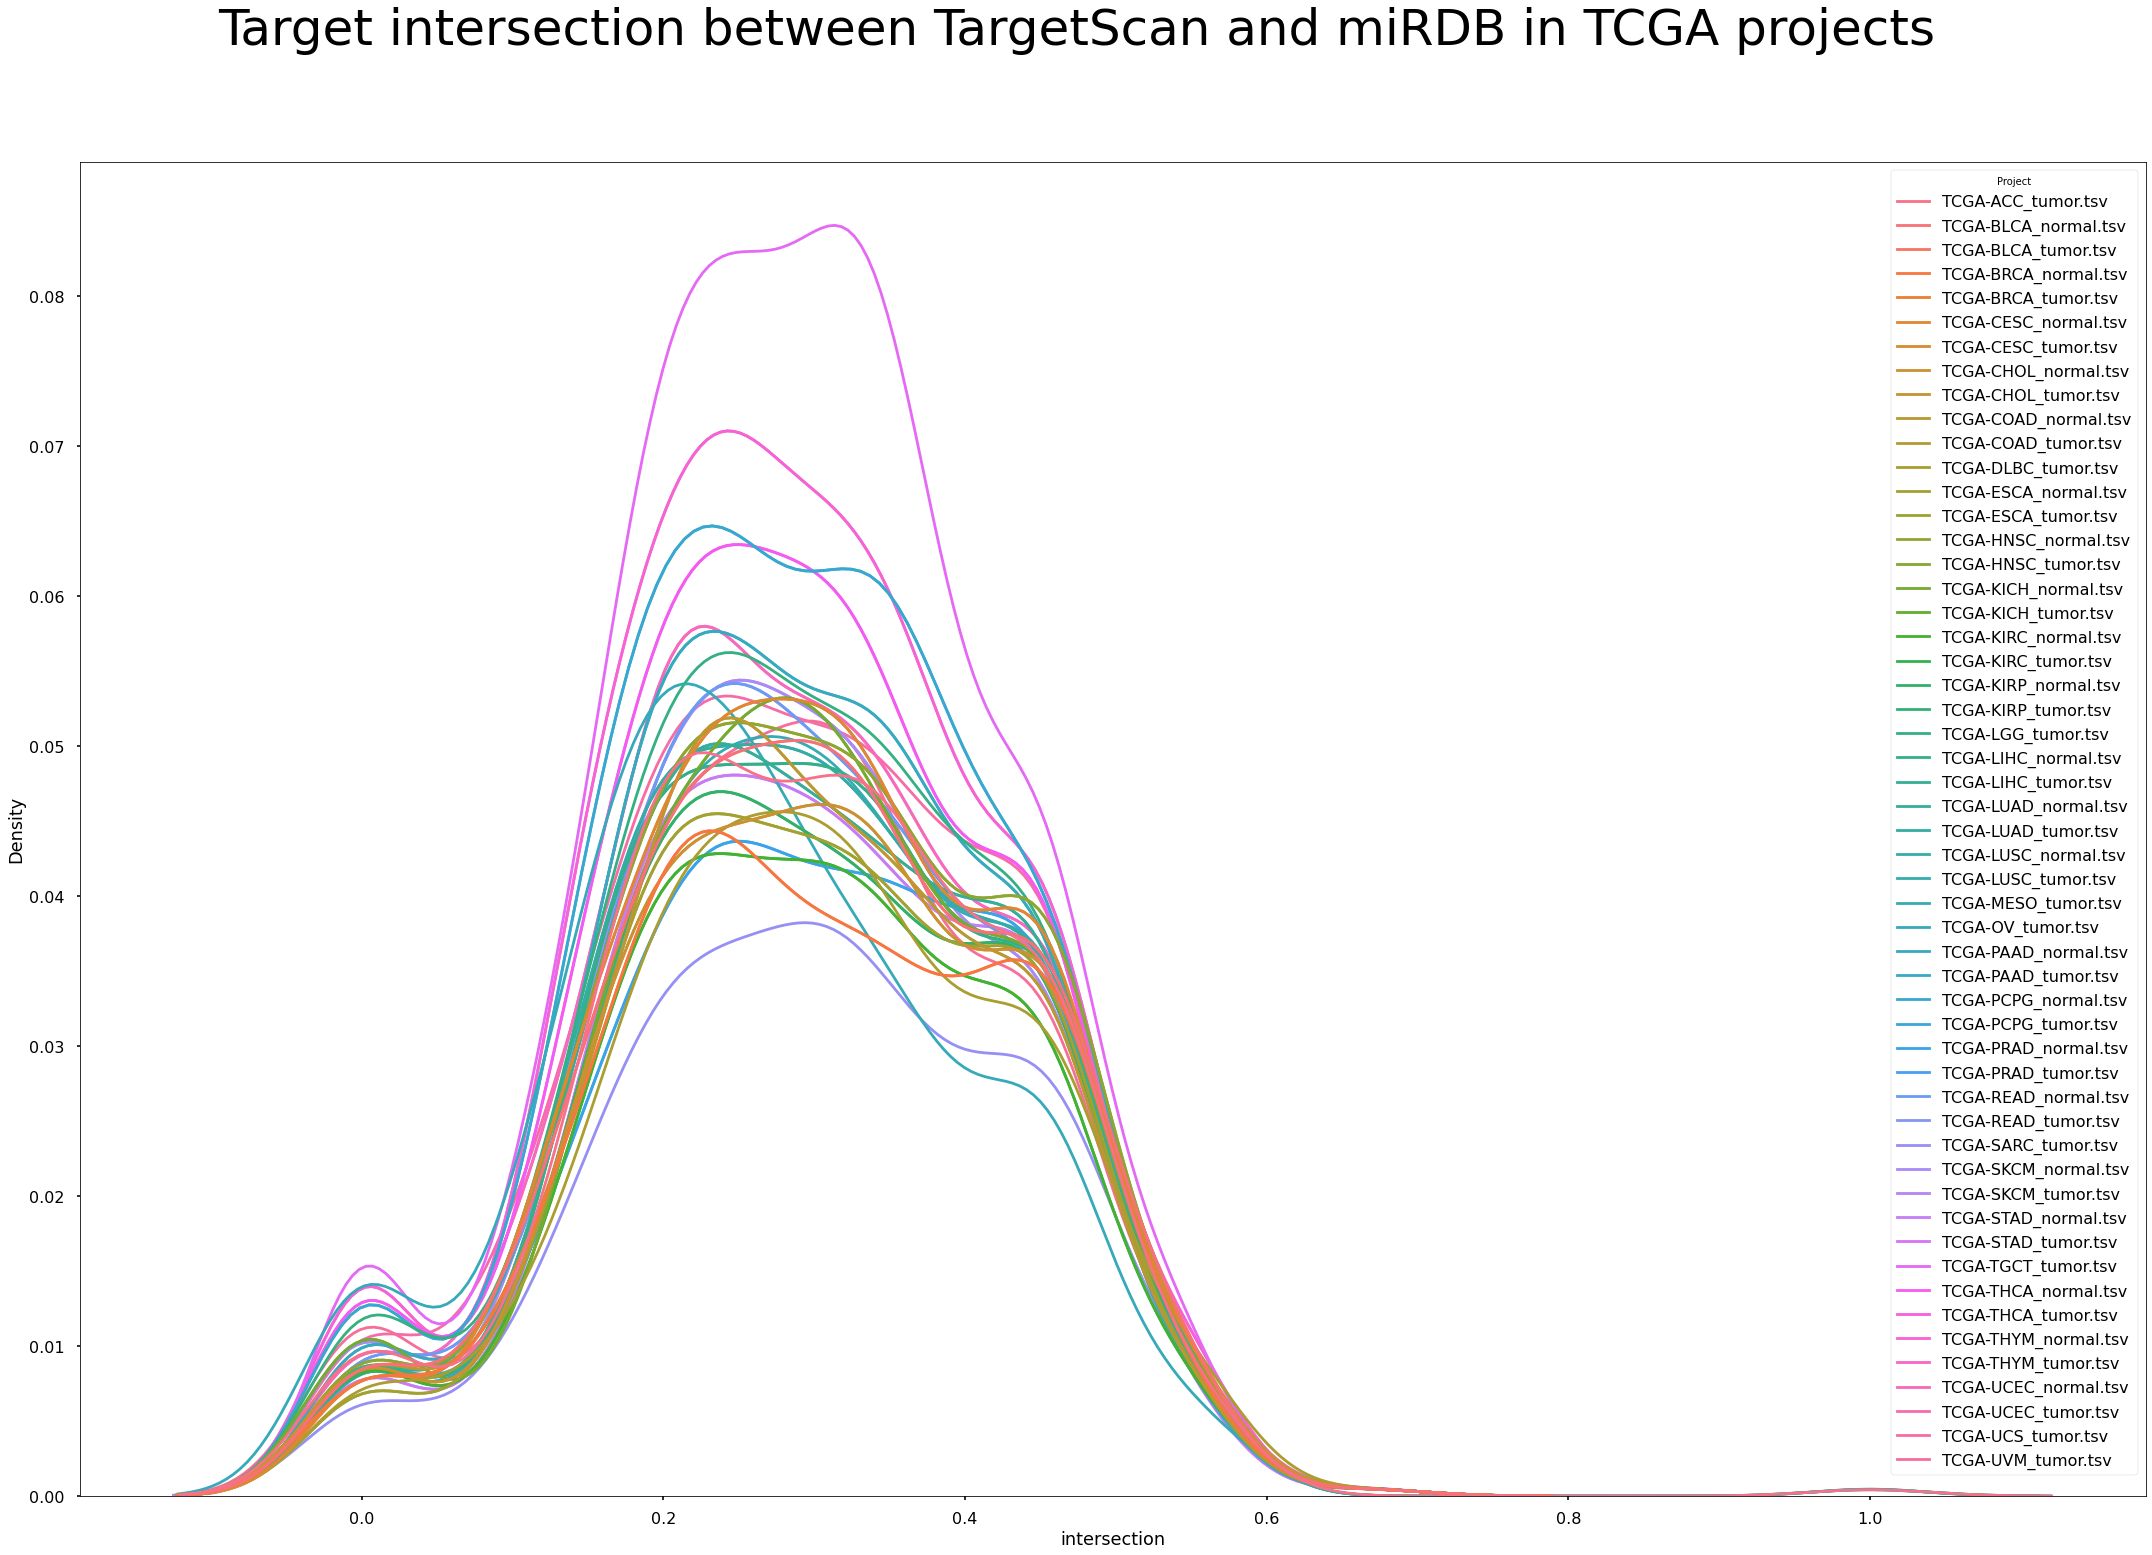

In [15]:
tmp = df.iloc[:, :-2].melt().dropna().fillna(-1)
cols = ['Project', 'intersection']
tmp.columns = cols

fig, ax = plt.subplots(1, 1, figsize=(30, 22))
sns.kdeplot(data=tmp, x=cols[1], hue=cols[0])
fig.suptitle('Target intersection between TargetScan and miRDB in TCGA projects', fontsize=50)
plt.tight_layout()
plt.show()

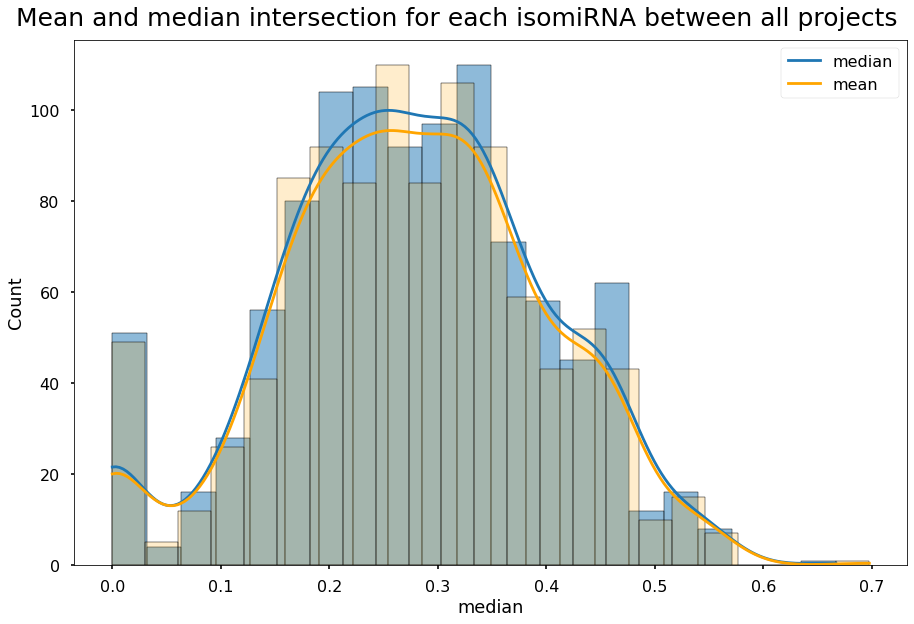

In [16]:
sns.histplot(data=df, x='median', kde=True)
sns.histplot(data=df, x='mean', kde=True, color='orange', alpha=0.2)
plt.suptitle('Mean and median intersection for each isomiRNA between all projects', fontsize=titlesize)
plt.legend(['median', 'mean'])
plt.tight_layout()
plt.show()